In [1]:
import numpy as np
import pandas as pd
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.model_selection import train_test_split
from lazypredict.Supervised import LazyRegressor


pd.set_option("display.max_rows", None)
pd.set_option("display.max_columns", None)

In [2]:
cols_cible_type = ["PumpSecondsOnSite", "TurnoutTimeSeconds", "TravelTimeSeconds"]
cols_cible = [
    ["PumpSecondsOnSite_min", "PumpSecondsOnSite_mean", "PumpSecondsOnSite_max"],
    ["TurnoutTimeSeconds_min", "TurnoutTimeSeconds_mean", "TurnoutTimeSeconds_max"],
    ["TravelTimeSeconds_min", "TravelTimeSeconds_mean", "TravelTimeSeconds_max"]
    # NumPumpsAttending??
]

def load_df(col_cible_type):
    df = pd.read_csv(f"../data/_df_ready_{col_cible_type}.csv", sep=";", low_memory=False)
    # Contrôle
    display(df.head(3))
    display(df.info())
    return df

,CalYear,HourOfCall_0,HourOfCall_1,HourOfCall_2,HourOfCall_3,HourOfCall_4,PropertyType_0,PropertyType_1,PropertyType_2,PropertyType_3,PropertyType_4,PropertyType_5,Postcode_district_0,Postcode_district_1,Postcode_district_2,Postcode_district_3,Postcode_district_4,NumPumpsAttending,StopCode_0,StopCode_1,StopCode_2,StopCode_3,StopCode_4,Month_0,Month_1,Month_2,Month_3,DayOfWeek_0,DayOfWeek_1,DayOfWeek_2,PumpSecondsOnSite_min,PumpSecondsOnSite_mean,PumpSecondsOnSite_max,TurnoutTimeSeconds_min,TurnoutTimeSeconds_mean,TurnoutTimeSeconds_max,TravelTimeSeconds_min,TravelTimeSeconds_mean,TravelTimeSeconds_max
0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,2.00,0,0,0,0,1,0,0,0,1,0,0,1,240.00,390.00,540.00,253.00,253.00,253.00,89.00,89.00,89.00
1,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,1.00,0,0,0,1,0,0,0,0,1,0,0,1,420.00,420.00,420.00,151.00,151.00,151.00,157.00,157.00,157.00
2,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,1.00,0,0,0,1,0,0,0,0,1,0,0,1,720.00,720.00,720.00,108.00,108.00,108.00,102.00,102.00,102.00


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1591527 entries, 0 to 1591526
Data columns (total 39 columns):
 #   Column                   Non-Null Count    Dtype  
---  ------                   --------------    -----  
 0   CalYear                  1591527 non-null  int64  
 1   HourOfCall_0             1591527 non-null  int64  
 2   HourOfCall_1             1591527 non-null  int64  
 3   HourOfCall_2             1591527 non-null  int64  
 4   HourOfCall_3             1591527 non-null  int64  
 5   HourOfCall_4             1591527 non-null  int64  
 6   PropertyType_0           1591527 non-null  int64  
 7   PropertyType_1           1591527 non-null  int64  
 8   PropertyType_2           1591527 non-null  int64  
 9   PropertyType_3           1591527 non-null  int64  
 10  PropertyType_4           1591527 non-null  int64  
 11  PropertyType_5           1591527 non-null  int64  
 12  Postcode_district_0      1591527 non-null  int64  
 13  Postcode_district_1      1591527 non-null 

None

,CalYear,HourOfCall_0,HourOfCall_1,HourOfCall_2,HourOfCall_3,HourOfCall_4,PropertyType_0,PropertyType_1,PropertyType_2,PropertyType_3,PropertyType_4,PropertyType_5,Postcode_district_0,Postcode_district_1,Postcode_district_2,Postcode_district_3,Postcode_district_4,StopCode_0,StopCode_1,StopCode_2,StopCode_3,StopCode_4,Month_0,Month_1,Month_2,Month_3,DayOfWeek_0,DayOfWeek_1,DayOfWeek_2
0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,1
1,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,1


(1591527, 29)


array([[-7.70524955e+00, -9.57322022e-03, -1.47483259e-02, ...,
        -8.67813918e-05, -3.13080116e-06, -9.24761113e-05],
       [-7.71240315e+00,  3.61324417e-02, -7.53448397e-02, ...,
         2.26623709e-05,  5.37240070e-05,  1.26610691e-05],
       [-7.71240315e+00,  3.61324417e-02, -7.53448397e-02, ...,
         2.26623709e-05,  5.37240070e-05,  1.26610691e-05],
       ...,
       [ 7.29068923e+00, -4.25318353e-02,  7.35043212e-01, ...,
        -8.03886703e-05, -8.73953009e-06, -6.86808088e-06],
       [ 7.30262819e+00,  2.50229748e-02,  7.51102730e-01, ...,
        -3.87946217e-05, -5.13319329e-05, -1.38020464e-05],
       [ 7.28288326e+00,  2.46272717e-01,  6.38287126e-01, ...,
        -2.32648913e-04, -1.89485124e-05, -3.58747405e-05]])

La part de variance expliquée est 1.0


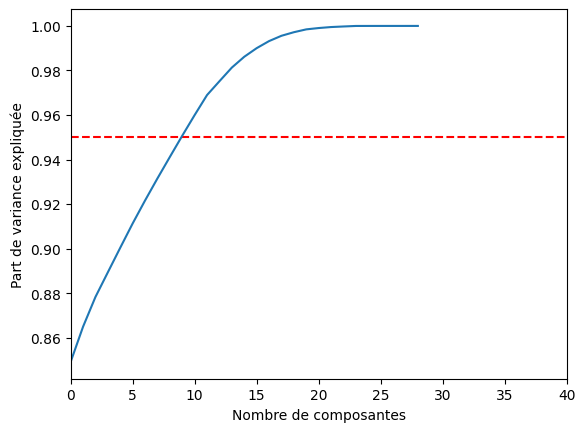

,CalYear,HourOfCall_0,HourOfCall_1,HourOfCall_2,HourOfCall_3,HourOfCall_4,PropertyType_0,PropertyType_1,PropertyType_2,PropertyType_3,PropertyType_4,PropertyType_5,Postcode_district_0,Postcode_district_1,Postcode_district_2,Postcode_district_3,Postcode_district_4,StopCode_0,StopCode_1,StopCode_2,StopCode_3,StopCode_4,Month_0,Month_1,Month_2,Month_3,DayOfWeek_0,DayOfWeek_1,DayOfWeek_2
0,1.00,-0.00,0.00,0.00,-0.00,-0.00,0.00,0.00,0.00,-0.00,0.00,-0.00,-0.00,-0.00,-0.00,-0.00,0.00,0.00,0.01,-0.00,-0.01,0.01,-0.00,-0.00,0.00,-0.00,0.00,-0.00,0.00
1,0.00,0.70,-0.66,-0.14,-0.09,-0.04,0.01,0.01,0.01,0.01,-0.02,0.03,0.00,0.00,0.00,0.00,0.00,0.00,0.02,0.15,-0.04,-0.14,-0.04,0.04,-0.00,0.00,-0.01,-0.00,-0.01


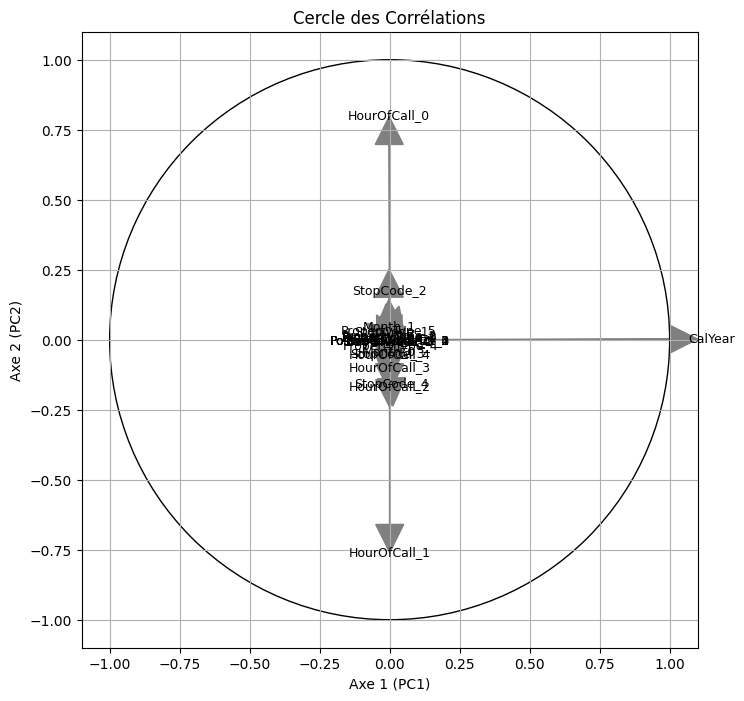

(635615, 39)
PumpSecondsOnSite_min


  2%|▏         | 1/42 [00:10<07:29, 10.97s/it]

{'Model': 'AdaBoostRegressor', 'R-Squared': 0.14016621569986432, 'Adjusted R-Squared': 0.1399700193732003, 'RMSE': np.float64(1303.3499745025906), 'Time taken': 10.970885992050171}


  5%|▍         | 2/42 [00:27<09:38, 14.47s/it]

{'Model': 'BaggingRegressor', 'R-Squared': -0.015696485750738454, 'Adjusted R-Squared': -0.01592824672960247, 'RMSE': np.float64(1416.5625956344986), 'Time taken': 16.913312911987305}


  7%|▋         | 3/42 [00:30<05:46,  8.87s/it]

{'Model': 'BayesianRidge', 'R-Squared': 0.12275277595712308, 'Adjusted R-Squared': 0.12255260624284103, 'RMSE': np.float64(1316.4816089412236), 'Time taken': 2.21421480178833}


 10%|▉         | 4/42 [00:32<04:04,  6.44s/it]

{'Model': 'DecisionTreeRegressor', 'R-Squared': -0.26798821067738055, 'Adjusted R-Squared': -0.2682775394217618, 'RMSE': np.float64(1582.7466499667812), 'Time taken': 2.7206084728240967}


 12%|█▏        | 5/42 [00:33<02:39,  4.30s/it]

{'Model': 'DummyRegressor', 'R-Squared': -2.645589276539795e-07, 'Adjusted R-Squared': -0.00022844398401167254, 'RMSE': np.float64(1405.574445073414), 'Time taken': 0.5000314712524414}


 14%|█▍        | 6/42 [00:34<01:55,  3.20s/it]

{'Model': 'ElasticNet', 'R-Squared': 0.10867538550615508, 'Adjusted R-Squared': 0.10847200362186304, 'RMSE': np.float64(1327.0025125240204), 'Time taken': 1.063523530960083}


 17%|█▋        | 7/42 [00:37<01:52,  3.20s/it]

{'Model': 'ElasticNetCV', 'R-Squared': 0.1145792485987317, 'Adjusted R-Squared': 0.11437721385416955, 'RMSE': np.float64(1322.6003803419571), 'Time taken': 3.1969213485717773}


 19%|█▉        | 8/42 [00:40<01:43,  3.06s/it]

{'Model': 'ExtraTreeRegressor', 'R-Squared': -0.2792729336299411, 'Adjusted R-Squared': -0.2795648373152366, 'RMSE': np.float64(1589.774039518648), 'Time taken': 2.752983331680298}


 21%|██▏       | 9/42 [04:25<39:53, 72.53s/it]

{'Model': 'ExtraTreesRegressor', 'R-Squared': -0.154902012401118, 'Adjusted R-Squared': -0.15516553720861825, 'RMSE': np.float64(1510.519597533994), 'Time taken': 225.28732085227966}


 24%|██▍       | 10/42 [04:26<26:50, 50.31s/it]

GammaRegressor model failed to execute
Some value(s) of y are out of the valid range of the loss 'HalfGammaLoss'.


 26%|██▌       | 11/42 [04:26<18:07, 35.08s/it]

GaussianProcessRegressor model failed to execute
Unable to allocate 1.88 TiB for an array with shape (508492, 508492) and data type float64


 29%|██▊       | 12/42 [05:18<20:01, 40.05s/it]

{'Model': 'GradientBoostingRegressor', 'R-Squared': 0.18493328970514833, 'Adjusted R-Squared': 0.18474730830099106, 'RMSE': np.float64(1268.9671307035628), 'Time taken': 51.4128155708313}


 31%|███       | 13/42 [05:21<14:02, 29.05s/it]

{'Model': 'HistGradientBoostingRegressor', 'R-Squared': 0.20734654991668688, 'Adjusted R-Squared': 0.207165682756006, 'RMSE': np.float64(1251.398045331883), 'Time taken': 3.747093439102173}


 33%|███▎      | 14/42 [05:25<10:00, 21.44s/it]

{'Model': 'HuberRegressor', 'R-Squared': 0.04952978226602289, 'Adjusted R-Squared': 0.0493129045755577, 'RMSE': np.float64(1370.323329935223), 'Time taken': 3.863208055496216}


In [ ]:
# Créez le cercle de corrélation
def draw_correlation_circle(df_charges_factorielles, pca, arrow_length=0.1, label_rotation=0):
    fig, ax = plt.subplots(figsize=(8, 8))
    for i, var in enumerate(df_charges_factorielles.columns):
        x = df_charges_factorielles.loc[0, var]
        y = df_charges_factorielles.loc[1, var]
        ax.arrow(0, 0, x, y, head_width=arrow_length, head_length=arrow_length, fc='gray', ec='gray')
        ax.text(x*1.15, y*1.15, var, ha='center', va='center', rotation=label_rotation, fontsize=9)
    circle = plt.Circle((0, 0), 1, facecolor='none', edgecolor='black')
    ax.add_artist(circle)
    ax.set_xlim(-1.1, 1.1)
    ax.set_ylim(-1.1, 1.1)
    ax.set_aspect('equal', adjustable='box')
    ax.set_xlabel('Axe 1 (PC1)')
    ax.set_ylabel('Axe 2 (PC2)')
    ax.set_title('Cercle des Corrélations')
    plt.grid()
    plt.show()

for index, name in enumerate(cols_cible_type):
    df = load_df(name)
    X = df.drop(["PumpSecondsOnSite_min", "PumpSecondsOnSite_mean", "PumpSecondsOnSite_max", "TurnoutTimeSeconds_min", "TurnoutTimeSeconds_mean",
                  "TurnoutTimeSeconds_max", "TravelTimeSeconds_min", "TravelTimeSeconds_mean", "TravelTimeSeconds_max", "NumPumpsAttending"], axis=1)
    display(X.head(2))
    print(X.shape)

    pca = PCA()
    data_2D = pca.fit_transform(X)
    display(data_2D)
    print("La part de variance expliquée est", round(pca.explained_variance_ratio_.sum(), 5))

    plt.figure()
    plt.xlim(0,40)
    plt.xlabel('Nombre de composantes')
    plt.ylabel('Part de variance expliquée')
    plt.axhline(y = 0.95, color ='r', linestyle = '--')
    plt.plot(pca.explained_variance_ratio_.cumsum());
    plt.show()

    variance_expliquee = pca.explained_variance_ratio_
    charges_factorielles = pca.components_
    # Créez un DataFrame pour afficher les corrélations de chaque variable avec chaque axe
    df_charges_factorielles = pd.DataFrame(
        charges_factorielles,
        columns=X.columns,
        #index=["Axe 1", "Axe 2", "Axe 3", "Axe 4", "Axe 5", "Axe 6"],
    )

    # Affichez le DataFrame des charges factorielles
    display(df_charges_factorielles.head(2))

    charges_factorielles = pca.components_
    # Appelez la fonction pour tracer le cercle de corrélation
    draw_correlation_circle(df_charges_factorielles, pca)

    # Auto ML
    df_limited = df[df.CalYear > 10]
    print(df_limited.shape)
    X = df_limited.drop(["PumpSecondsOnSite_min", "PumpSecondsOnSite_mean", "PumpSecondsOnSite_max", "TurnoutTimeSeconds_min", "TurnoutTimeSeconds_mean",
                         "TurnoutTimeSeconds_max", "TravelTimeSeconds_min", "TravelTimeSeconds_mean", "TravelTimeSeconds_max", "NumPumpsAttending"], axis=1)
    for col_cible in cols_cible[index]:
        print(col_cible)
        y = df_limited[col_cible]
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
        reg = LazyRegressor(verbose=2, ignore_warnings=False, custom_metric=None)
        models, predictions = reg.fit(X_train, X_test, y_train, y_test)
        print(models)

# tester automl avant et après PCA et aussi gridsearch pour comparer
# save du PCA

In [ ]:
import autosklearn.regression as autosk_reg
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

for index, name in enumerate(cols_cible_type):
    df = load_df(name)
    X = df.drop(["PumpSecondsOnSite_min", "PumpSecondsOnSite_mean", "PumpSecondsOnSite_max", "TurnoutTimeSeconds_min", "TurnoutTimeSeconds_mean",
                  "TurnoutTimeSeconds_max", "TravelTimeSeconds_min", "TravelTimeSeconds_mean", "TravelTimeSeconds_max", "NumPumpsAttending"], axis=1)
    display(X.head(2))
    print(X.shape)
    
    # Auto ML
    df_limited = df[df.CalYear > 10]
    X = df_limited.drop(["PumpSecondsOnSite_min", "PumpSecondsOnSite_mean", "PumpSecondsOnSite_max", "TurnoutTimeSeconds_min", "TurnoutTimeSeconds_mean",
                  "TurnoutTimeSeconds_max", "TravelTimeSeconds_min", "TravelTimeSeconds_mean", "TravelTimeSeconds_max", "NumPumpsAttending"], axis=1)
    for col_cible in cols_cible[index]:
        print(col_cible)
        y = df_limited[col_cible]
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
        reg = LazyRegressor(verbose=0, ignore_warnings=False, custom_metric=None)
        models, predictions = reg.fit(X_train, X_test, y_train, y_test)
        print(models)

        # Créer et entraîner Auto-sklearn pour la régression
        automl = autosk_reg.AutoSklearnRegressor(
            time_left_for_this_task=300,  # Temps total alloué pour l'entraînement (en secondes)
            per_run_time_limit=30,  # Temps maximum pour chaque modèle testé
            n_jobs=-1,  # Utilise tous les cœurs disponibles
            ensemble_size=10,  # Nombre maximal de modèles dans l'ensemble final
            seed=42,
        )

        # Entraînement
        automl.fit(X_train, y_train)
        # Prédiction
        y_pred = automl.predict(X_test)
        # Évaluation des performances
        mse = mean_squared_error(y_test, y_pred)
        r2 = r2_score(y_test, y_pred)

        print(f"Mean Squared Error: {mse}")
        print(f"R2 Score: {r2}")
        # Afficher un résumé détaillé des modèles et hyperparamètres
        print("\n********** Rapport détaillé des modèles **********\n")
        print(automl.show_models())
        print("\n********** Statistiques d'entraînement **********\n")
        print(automl.sprint_statistics())